<a href="https://colab.research.google.com/github/jobellet/uneye/blob/master/UnEye_online_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run the first cell below to install the software

In [1]:
# download U'n'Eye
!git clone https://github.com/berenslab/uneye.git

Path_to_UnEye_folder = '/content/uneye/'
# go to the uneye folder
import os
os.chdir(Path_to_UnEye_folder)

## install dependencies


# to do deep learning
# http://pytorch.org/
from os.path import exists

import numpy as np
import uneye
import scipy.io as io
import matplotlib.pyplot as plt
from google.colab import files

# to read .mat files
!pip install mat4py
import mat4py

Cloning into 'uneye'...
remote: Enumerating objects: 990, done.
remote: Total 990 (delta 0), reused 0 (delta 0), pack-reused 990
Receiving objects: 100% (990/990), 169.38 MiB | 18.29 MiB/s, done.
Resolving deltas: 100% (211/211), done.
Checking out files: 100% (489/489), done.


# Training


Train network with own training data (example data in folder 'data').



For training, 4 inputs are **necessary**:
    - horizontal eye position (in deg)
    - vertical eye position (in deg)
    - ground truth labels for saccades (encoded as 1). Additional labels are optional (e.g. post-saccadic oscillation, encoded as 2 etc.)
    - sampling frequency of the eye tracker
    
**Optional** input arguments are:
    - min_sacc_dur: minimum saccade duration (in ms) for removal of small saccades (post-processing), default: 1==no removal
    - min_sacc_dist: minimum distance between two saccades for merging of close-by saccades, default: 1==no merge
    - weights_name: filename for storage of trained weights. All trained weights will automatically be safed in the local folder 'training'. The default filename is 'weights'

  
Call the model with **uneye.DNN()** and then run training with the method **model.train()**

## Run the next cell to upload your data

In [2]:
os.chdir(Path_to_UnEye_folder+'/data')
os.makedirs('mydata', exist_ok=True)
os.chdir('mydata')
datapath = 'data/mydata/'
uploaded = files.upload()
os.chdir(Path_to_UnEye_folder)


Saving L.csv to L.csv
Saving X.csv to X.csv
Saving Y.csv to Y.csv


##Change the next cell so that it uses your data

In [3]:
########### YOUR DATA ############
x_filename = 'X.csv'  
y_filename = 'Y.csv'
labels_filename = 'L.csv'
##################################

##################################
########### Parameters ###########

min_sacc_dur = 5 #minimum saccade duration in ms
min_sacc_dist = 10 #minimum saccade distance in ms
sampfreq = 1000 #Hz
weights_name = 'myweights'


##Run the next cell to train your network

Number of classes: 2
Using GPU: True
Training. Please wait.
Early stopping at epoch 36 before overfitting occurred.
Model parameters saved to ./training/myweights


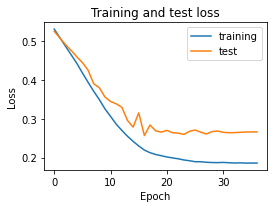

In [4]:
# load your data .mat or .csv

if x_filename.find('.mat')>-1:
  Xtrain = np.asarray(mat4py.loadmat(datapath+x_filename)['X'])
elif x_filename.find('.csv')>-1:
  Xtrain = np.loadtxt(datapath+x_filename,delimiter=',')

if y_filename.find('.mat')>-1:
  Ytrain = np.asarray(mat4py.loadmat(datapath+y_filename)['Y'])
elif y_filename.find('.csv')>-1:
  Ytrain = np.loadtxt(datapath+y_filename,delimiter=',')


if labels_filename.find('.mat')>-1:
  Ltrain = np.asarray(mat4py.loadmat(datapath+labels_filename)['Sacc'])
elif labels_filename.find('.csv')>-1:
  Ltrain = np.loadtxt(datapath+labels_filename,delimiter=',')



# fit model on training data
# weights will automatically be saved to local folder 'training'
model = uneye.DNN(weights_name=weights_name,
                 sampfreq=sampfreq,
                 min_sacc_dur=min_sacc_dur,
                 min_sacc_dist=min_sacc_dist,)
model.train(Xtrain,Ytrain,Ltrain)
# during training, the current iteration and maximum number of iterations is shown. Usually, training is stopped early.

#plot loss
f = plt.figure(figsize=(4,3))

plt.plot(model.loss_train,label='training')
plt.plot(model.loss_val,label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and test loss')
plt.legend()
plt.tight_layout()
plt.show()


## Run the next cell to download the weights of the network trained on your data

In [5]:
files.download(Path_to_UnEye_folder+'training/'+weights_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>